In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import alibi as ab
from alibi.explainers import KernelShap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('C:\\Users\\kusum\\Downloads\\archive1\\adult.csv')


In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**Label Encoder**: A *label encoder* is a technique used to convert categorical data, especially labels, into a numerical format. 

In [ ]:
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [8]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [9]:
# Split the data
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from alibi.explainers import AnchorTabular

# AnchorTabular explainer
feature_names = X.columns.tolist()
predict_fn = lambda x: clf.predict_proba(x)
explainer = AnchorTabular(predict_fn, feature_names=feature_names)
explainer.fit(X_train, disc_perc=(25, 50, 75))

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': None, 'disc_perc': (25, 50, 75)},
  'version': '0.9.6'}
)

In [13]:
# Explain a prediction
idx = 0  # Index of the instance to explain
explanation = explainer.explain(X_test[idx].reshape(1, -1), threshold=0.95)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

(-1.0, 14.0)

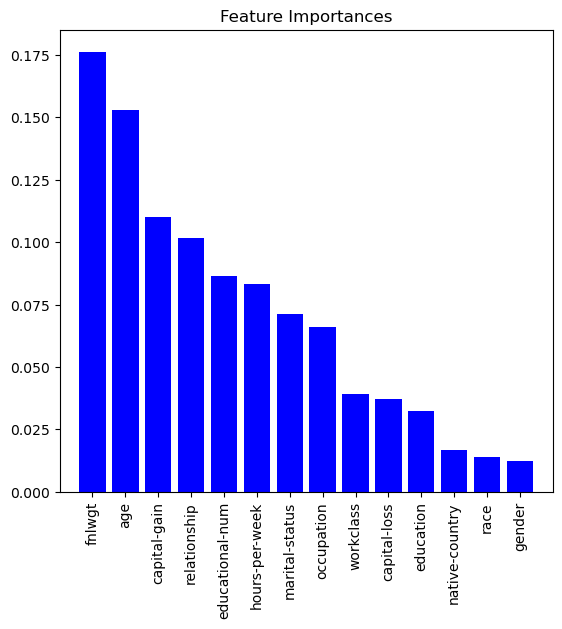

In [16]:
# Plot 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])

In [17]:
anchor_features = explanation.data['anchor']  
precision = explanation.data['precision']
coverage = explanation.data['coverage']

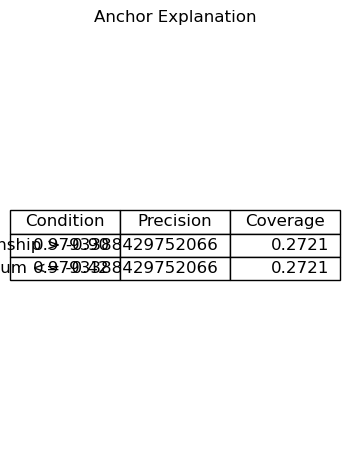

In [20]:
# Create table for anchor explanation
plt.subplot(1, 2, 2)
plt.title("Anchor Explanation")
cell_text = [[f, precision, coverage] for f in anchor_features]
plt.axis('off')
table = plt.table(cellText=cell_text, colLabels=['Condition', 'Precision', 'Coverage'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.tight_layout()
plt.show()

**Plotly:**
*Plotly* is a powerful open-source graphing library that allows users to create interactive, publication-quality visualizations. 
It is widely used in data science, machine learning, and business analytics for its ability to generate complex and aesthetically 
pleasing charts with ease. 
Plotly is available for multiple programming languages, including Python, R, MATLAB, and JavaScript, with the Python version being particularly popular.

In [21]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

# Create a bar plot for feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

In [22]:
# Feature importances plot
feature_importances = go.Bar(
    x=[feature_names[i] for i in indices],
    y=importances[indices],
    marker=dict(color=importances[indices], colorscale='Viridis'),
    name='Feature Importances'
)

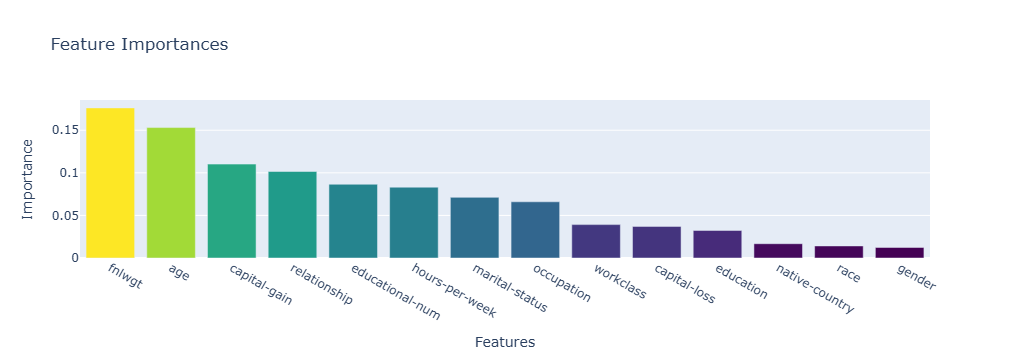

In [25]:
fig_importances = go.Figure(data=feature_importances)
fig_importances.update_layout(
    title='Feature Importances',
    xaxis_title='Features',
    yaxis_title='Importance'
)

# Show the feature importances figure
fig_importances.show()


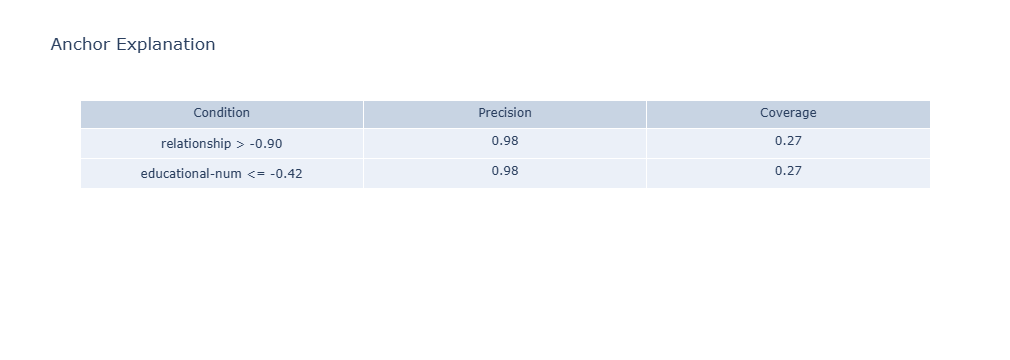

In [26]:
# Extract anchor explanation details
anchor_features = explanation.data['anchor']  # Conditions that make up the anchor
precision = explanation.data['precision']
coverage = explanation.data['coverage']

# Create anchor explanation table
anchor_table = go.Figure(data=[go.Table(
    header=dict(values=['Condition', 'Precision', 'Coverage']),
    cells=dict(values=[anchor_features, [f"{precision:.2f}"] * len(anchor_features), [f"{coverage:.2f}"] * len(anchor_features)])
)])
anchor_table.update_layout(
    title='Anchor Explanation'
)
anchor_table.show()